In [1]:
from __future__ import annotations

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 20})
plt.rcParams['font.family'] = 'Arial'
mpl.rcParams['lines.linewidth'] = 2.3
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['svg.fonttype'] = "none"
mpl.rcParams['svg.hashsalt'] = "42"
mpl.rcParams['pdf.fonttype'] = "42"
mpl.rcParams['ps.fonttype'] = "42"

SYS_NAME = 'Sedna' # 'Andes'

In [2]:
def make_arrow_axis(ax):
    ax.set_xticks([])
    ax.set_yticks([])

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['bottom'].set_linewidth(1)  
    ax.spines['bottom'].set_capstyle('projecting')
    ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
           transform=ax.get_yaxis_transform(), clip_on=False)
    ax.spines['left'].set_position(('data',0))
    ax.spines['left'].set_capstyle('projecting')
    ax.spines['left'].set_linewidth(1)  
    ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
           transform=ax.get_xaxis_transform(), clip_on=False)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')

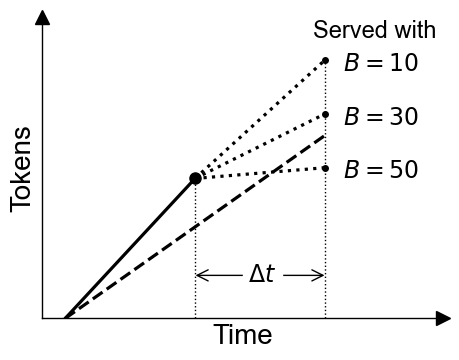

In [8]:
def plot_timeline_with_external_legend():
    fig1, ax1 = plt.subplots(figsize=(5, 4), tight_layout=True)
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Tokens")
    ax1.set_xlim(left=0, right=1.7)
    ax1.set_ylim(bottom=0, top=1.4)
    make_arrow_axis(ax1)
    
    tokens_serve = [0.70, 0.95, 1.2]
    batch_sizes = [50, 30, 10]
    ax1.plot([0.1, 1.2], [0.0, 0.85], "k--")
    ax1.plot([0.1, 0.65], [0.0, 0.65], 'k-')
    ax1.scatter([0.65], [0.65], color="k")
    for tok in tokens_serve:
        ax1.plot([0.65, 1.2], [0.65, tok], 'k:')
        ax1.scatter(1.2, tok, color='k', marker=".")
    for tok, batch_size in zip(tokens_serve, batch_sizes):
        #ax1.annotate(f"$Q_\\text{{serve}}({batch_size})$", xy=(1.25, tok - 0.02))
        ax1.annotate(f" $B = {batch_size}$", xy=(1.25, tok - 0.05), fontsize=17)
    ax1.annotate("Served with", xy=(1.25 - 0.10, 1.3), fontsize=17)
    ax1.axvline(x=0.65, ymax=0.47, color='k', linestyle=':', linewidth=1)
    ax1.axvline(x=1.2, ymax=0.85, color='k', linestyle=':', linewidth=1)
    ax1.annotate("", xy=(0.65 - 0.01, 0.2), ha="center", va="center", fontsize=10,
                 arrowprops=dict(arrowstyle='<->', color='k', linewidth=1, mutation_scale=20),
                 xytext=(1.2 + 0.01, 0.2))
    ax1.text((0.65 + 1.2) / 2 - 0.05, 0.17, r"$\Delta t$", fontsize=17, bbox=dict(facecolor="white", edgecolor="white"))
    fig1.savefig("Q_serve.pdf", metadata={"CreationDate": None})
    
    fig2, ax2 = plt.subplots(figsize=(5, 4), tight_layout=True)
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Tokens")
    ax2.set_xlim(left=0, right=1.7)
    ax2.set_ylim(bottom=0, top=1.4)
    make_arrow_axis(ax2)
    
    ideal_line, = ax2.plot([0.1, 1.2], [0.0, 0.85], "k--", label="Ideal Consumption Timeline")
    actual_line, = ax2.plot([0.1, 0.65], [0.0, 0.65], "k-", label="Actual Delivery Timeline")
    ax2.scatter([0.65], [0.65], color="k")
    potential_line, = ax2.plot([0.65, 1.2], [0.65, 0.65], 'k:', label="Expected Delivery Timeline (served with batch size $B$ or not served)")
    ax2.scatter([1.2], [0.65], color="k", marker=".")
    #ax2.annotate(r"$Q_\text{wait}$", xy=(1.25, 0.65 - 0.02))
    ax2.annotate("No tokens\ngenerated", xy=(1.25, 0.65 - 0.1), fontsize=17)
    ax2.axvline(x=0.65, ymax=0.47, color='k', linestyle=':', linewidth=1)
    ax2.axvline(x=1.2, ymax=0.47, color='k', linestyle=':', linewidth=1)
    ax2.annotate("", xy=(0.65 - 0.01, 0.2), ha="center", va="center", fontsize=10,
                 arrowprops=dict(arrowstyle='<->', color='k', linewidth=1, mutation_scale=20),
                 xytext=(1.2 + 0.01, 0.2))
    ax2.text((0.65 + 1.2) / 2 - 0.05, 0.17, r"$\Delta t$", fontsize=17, bbox=dict(facecolor="white", edgecolor="white"))
    fig2.savefig("Q_wait.pdf", metadata={"CreationDate": None})
    
    # External legend
    fig_legend, ax_legend = plt.subplots(figsize=(10, 1), tight_layout=True)
    ax_legend.axis('off')
    fig_legend.legend(handles=[ideal_line, potential_line, actual_line], loc='center', ncol=2, handlelength=2.2, columnspacing=-12)
    fig_legend.savefig("q_serve_wait_legend.pdf", metadata={"CreationDate": None})

plot_timeline_with_external_legend()